# Medidas de Posição e Tendência Central

Importando as bibliotecas

In [1]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados.

In [2]:
df = pd.read_csv("../../Datasets/cars.csv")

Verificando os dados.

In [3]:
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


Verificando as informações do conjunto de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Limpando os dados do atributo MSRP.

In [5]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

Verificando os dados após limpeza.

In [6]:
df['MSRP'].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

Verificando as informações do conjunto de dados.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Transformando os dados para o formato numérico.

In [8]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 50.3+ KB


In [10]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Calculando a média aritmética.

In [11]:
df["MSRP"].mean()

32774.85514018692

Mediana

In [12]:
df["MSRP"].median()

27635.0

Moda

In [13]:
df["MSRP"].mode()

0     13270
1     15389
2     19635
3     19860
4     21055
5     21595
6     23495
7     23895
8     25700
9     27490
10    28495
11    29995
12    31545
13    33995
14    34495
15    35940
16    49995
17    74995
Name: MSRP, dtype: int64

In [14]:
df["MSRP"].value_counts()

33995    2
21595    2
29995    2
28495    2
23495    2
        ..
33540    1
22010    1
37530    1
29380    1
35145    1
Name: MSRP, Length: 410, dtype: int64

Variação

In [15]:
df["MSRP"].var()

377591612.88763154

Desvio padrão

In [16]:
df["MSRP"].std()

19431.71667371752

Valor máximo.

In [17]:
df["MSRP"].max()

192465

Valor mínimo

In [18]:
df["MSRP"].min()

10280

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
%matplotlib inline

Função para calcular estatísticas.

In [20]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}".format(mean,median,mode,var,std))
  return msg

Considere a seguinte amostra.

In [21]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [22]:
calcula_estatisticas(s0)

Media: 5.08
Moda: 5.0
Mediana: 5
Variância: 0.41
Desvio Padrão: 0.64


### Gerando dados aleatórios

Amostra seguindo uma distribuição normal

In [23]:
sample_normal = np.random.normal(1,0.5,500)

In [24]:
sample_normal[:10]

array([0.13425471, 1.51498297, 1.20845531, 0.68346862, 0.60252558,
       0.90170362, 1.84886868, 0.61264421, 0.31953941, 1.7555748 ])

In [25]:
calcula_estatisticas(sample_normal)

Media: 0.97
Moda: 0.94
Mediana: -0.61
Variância: 0.25
Desvio Padrão: 0.5


Visualizando a distribuição

/tmp/ipykernel_10520/644173569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_normal)


<AxesSubplot:ylabel='Density'>

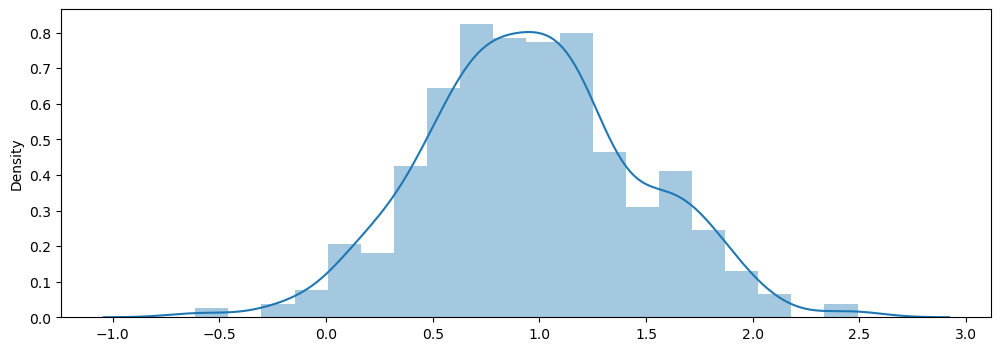

In [26]:
fig = plt.figure(figsize=(12, 4))
sns.distplot(sample_normal)

Distribuição simétrica.

Considere o seguinte exemplo

In [27]:
exp = np.arange(2,len(sample_normal),2)

Verificando os expoentes

In [28]:
exp[:10]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Gerando uma distribuição assimétrica positiva

In [29]:
sample_assimetrica_positiva = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_positiva.append(s*e)

In [30]:
calcula_estatisticas(sample_assimetrica_positiva)

Media: 244.68
Moda: 206.92
Mediana: -250.37
Variância: 39874.95
Desvio Padrão: 199.69


Visualizando a distribuição

/tmp/ipykernel_10520/753982618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_assimetrica_positiva)


<AxesSubplot:ylabel='Density'>

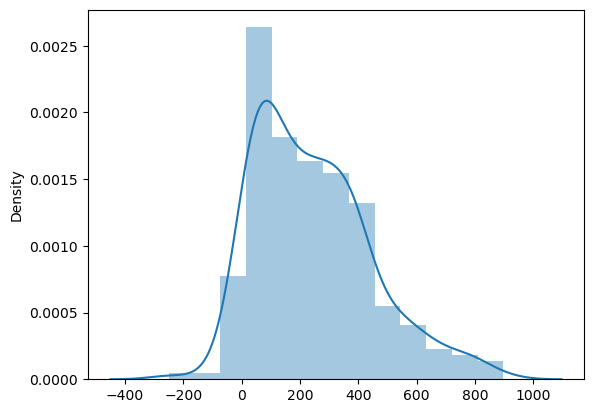

In [31]:
sns.distplot(sample_assimetrica_positiva)

Gerando uma distribuição assimétrica negativa.

In [32]:
exp = (np.arange(2,len(sample_normal),2))*-1

Verificando os expoêntes

In [33]:
exp[:10]

array([ -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

In [34]:
sample_assimetrica_negativa = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_negativa.append(s*e)

In [35]:
calcula_estatisticas(sample_assimetrica_negativa)

Media: -244.68
Moda: -206.92
Mediana: -897.23
Variância: 39874.95
Desvio Padrão: 199.69


Visualizando a distribuição

/tmp/ipykernel_10520/2332176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_assimetrica_negativa)


<AxesSubplot:ylabel='Density'>

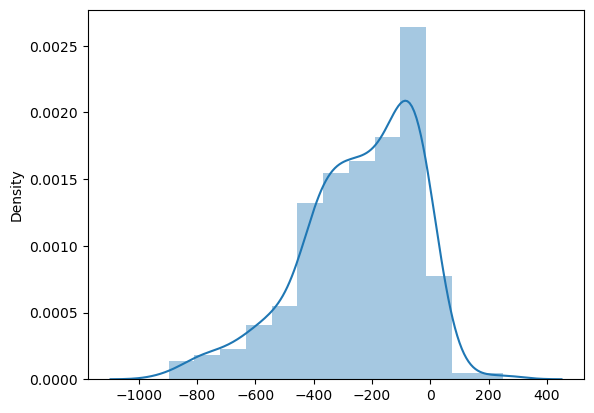

In [36]:
sns.distplot(sample_assimetrica_negativa)

Verificando graficamente as distribuições dos atributos do Dataframe

/tmp/ipykernel_10520/241815726.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],ax=axes[i//3,i%3])
/tmp/ipykernel_10520/241815726.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],ax=axes[i//3,i%3])
/tmp/ipykernel_10520/241815726.py:5: UserWarning: 

`distplot` is a de

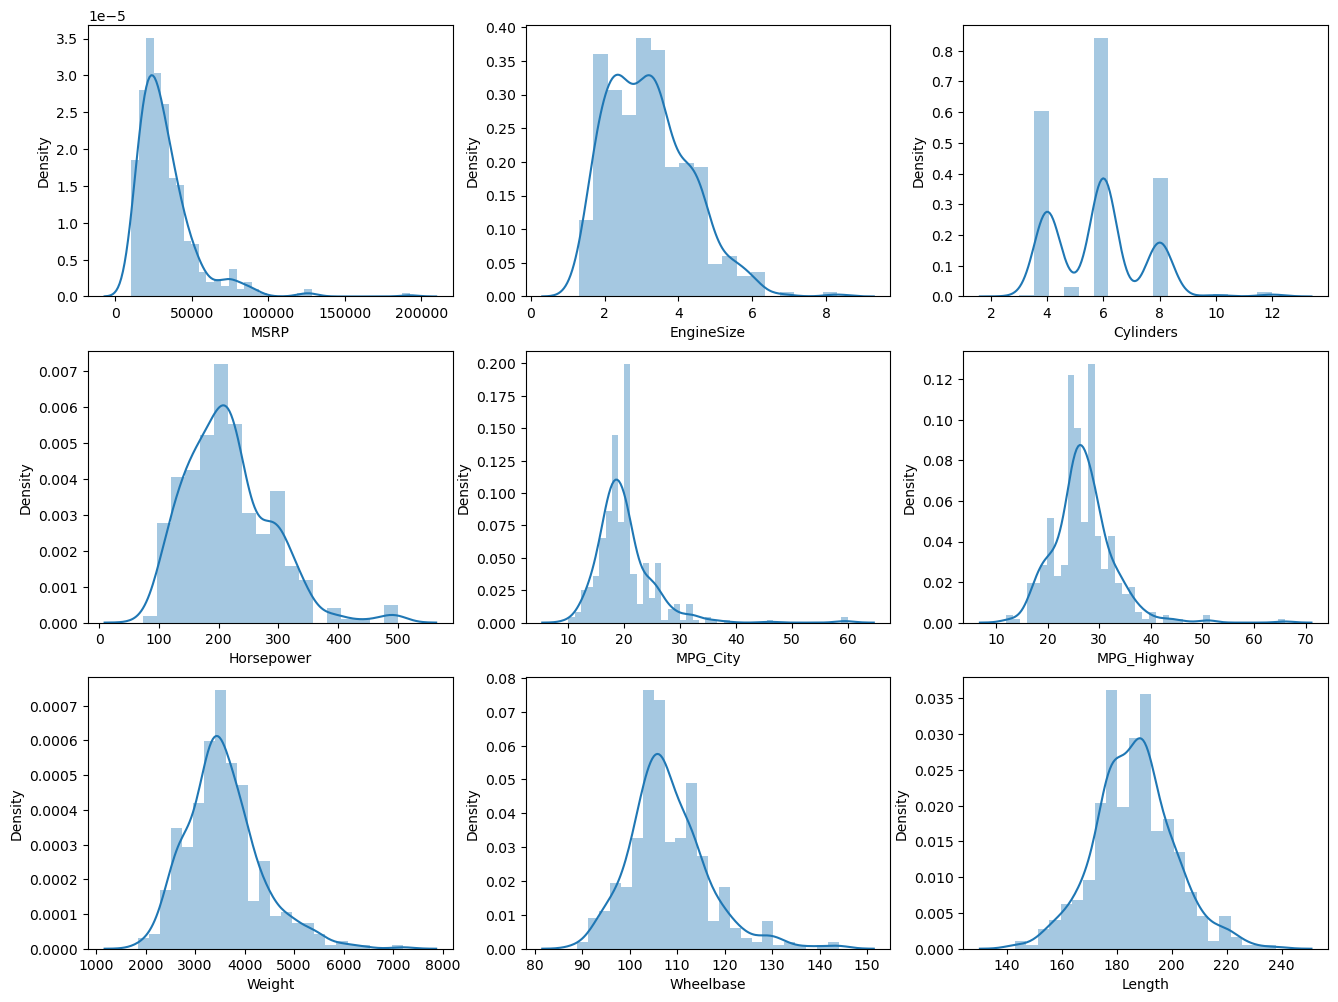

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i//3,i%3])

Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [38]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: MSRP, Coeficiente de Variação: 59.29 %, Media: 32774.86, Mediana: 27635.0
Atributo: EngineSize, Coeficiente de Variação: 34.64 %, Media: 3.2, Mediana: 3.0
Atributo: Cylinders, Coeficiente de Variação: 26.82 %, Media: 5.81, Mediana: 6.0
Atributo: Horsepower, Coeficiente de Variação: 33.27 %, Media: 215.89, Mediana: 210.0
Atributo: MPG_City, Coeficiente de Variação: 26.11 %, Media: 20.06, Mediana: 19.0
Atributo: MPG_Highway, Coeficiente de Variação: 21.39 %, Media: 26.84, Mediana: 26.0
Atributo: Weight, Coeficiente de Variação: 21.21 %, Media: 3577.95, Mediana: 3474.5
Atributo: Wheelbase, Coeficiente de Variação: 7.69 %, Media: 108.15, Mediana: 107.0
Atributo: Length, Coeficiente de Variação: 7.7 %, Media: 186.36, Mediana: 187.0


## Teste de hipótese

In [39]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_rel

In [40]:
from scipy.stats import norm
import numpy as np

# Cálculo do Z crítico para a probabilidade de 95%
# Norm.ppf () calcula o multiplicador do desvio padrão para um intervalo de confiança específico
prob = norm.ppf(0.95)

# Mostra o valor da probabilidade para 95%
print("Z crítico para a probabilidade para 95%: ", prob)

# Parâmetros para o teste
mu = 20            # média
sigma = np.sqrt(4) # desvio padrão
n = 20             # tamanho da amostra

# Cálculo do valor crítico
Xc = mu + (sigma/np.sqrt(n))*prob

# Mostra o valor crítico
print("Valor crítico: ", Xc, " mg")

# Aplicando as observações
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]

# Calculando a média das observações
Xobs = np.mean(X)

# Mostra o valor médio das observações
print("Valor médio observado: ", Xobs, " mg")

# Verificando se o valor médio ultrapassa o valor crítico
print("Teste de Hipótese: ")
if(Xobs < Xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Z crítico para a probabilidade para 95%:  1.6448536269514722
Valor crítico:  20.735600904580114  mg
Valor médio observado:  20.45  mg
Teste de Hipótese: 
Aceitamos H0


In [41]:
# Hipóteses:
# H0: As médias das duas amostras são iguais.
# H1: As médias das duas amostras são diferentes.

# Amostra da turma A:
amostra_turma_A = [78, 85, 90, 88, 92]

# Amostra da turma B:
amostra_turma_B = [82, 88, 85, 80, 86]

# Realizar o teste de hipótese usando o teste t de amostras independentes (duas caudas):
t_statistic, p_value = ttest_ind(amostra_turma_A, amostra_turma_B)

# Nível de significância para o teste (usualmente 0.05):
alpha = 0.05

# Interpretar o resultado:
if p_value < alpha:
    print("Rejeitar a hipótese nula. As médias das duas turmas são estatisticamente diferentes.")
else:
    print("Aceitar a hipótese nula. Não há evidências suficientes para concluir que as médias são diferentes.")

Aceitar a hipótese nula. Não há evidências suficientes para concluir que as médias são diferentes.


In [42]:
# Lendo o conjunto de dados
df = pd.read_csv('../../Datasets/german_credit_data.csv')
df


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [43]:
# Extraindo as colunas que serão utilizadas
credito = df['Credit amount']
idade = df['Age']
genero = df['Sex']
imovel = df['Housing']

In [44]:
# Teste de hipótese para duas amostras independentes
# H0: Médias são iguais
# H1: Médias são diferentes
t_value, p_value = ttest_ind(credito[genero == 'female'], credito[genero == 'male'])
print(t_value)
print(p_value)

-2.9662057871310363
0.0030868064209731367


In [45]:
# Teste de hipótese para duas amostras independentes
# H0: Médias são iguais
# H1: Médias são diferentes
t_value, p_value = ttest_ind(credito[imovel == 'own'], credito[imovel == 'free'])
print(t_value)
print(p_value)

-6.355743008789463
3.4408235114187516e-10


In [46]:
# Teste de hipótese para duas amostras relacionadas
# H0: Médias são iguais
# H1: Médias são diferentes

credito.corr(idade)

0.0327164166654481